In [3]:
from src.utils import draw, draw_trajectories, draw_trajectory_colored, get_modules, get_directional, plot_inputs
from src.simulation import simulation
from src.PIDController import PID_Controller
from src.verification import verification

In [4]:
import numpy as np

from tqdm import trange

# System definition

## Starting state

- First tuple: $(x, y)$
- Second tuple: $(x_{speed}, y_{speed})$
- Angle in degree

In [5]:
start   = [(100, 100), (0, 0), 0]

## Target state

- First tuple: $(x, y)$
- Second tuple: $(x_{speed}, y_{speed})$
- Angle in degree

In [6]:
# targets = np.array([[500, 400, 0, 0],
#                     [400, 700, 0, 0],
#                     [800, 800, 0, 0],
#                     [900, 900, 0, 0]
                   # ])
targets = np.array([
                    # [300, 350, 0, 0],
                    # [600, 500, 0, 0],
                    # [800, 650, 0, 0],
                    [900, 900, 0, 0],
                   ])

## Obstacles state

- First tuple: $(x, y)$
- Angle in degree

In [7]:
obstacles = [[(300, 450), 0], 
             [(300, 250), 0], 
             [(600, 400), 0],
             [(600, 600), 0],
             [(800, 750), 0],
             [(800, 550), 0]
            ]
# obstacles = []

## Noise

Possible noise that can be used
$$(x, y, x_{speed}, y_{speed})$$

In [8]:
noise = 0.5
noise = [noise]*4

# PID Optimization

Requires some time, to speed-up the process some nice values were found
- One when using Kalman filter
- One when using Luemberger Observer

In [9]:
initial_guess = [0.5, 0.5, 0.5]   

# LQR = True
LQR = False

# kalman = True
kalman = False

# use_PID = True
use_PID = False

## Optimization

In [10]:
if use_PID:
    PID = PID_Controller(start, obstacles, targets, reference=0, simulation_time=1000, kalman=kalman, noise=noise, LQR=LQR)
    K   = PID.optimize_pid(initial_guess)
    Kp, Ki, Kd = K

    print(K)
else:
    PID = None
    Kp, Ki, Kd = 0, 0, 0

In [11]:
# PID-kalman
PID = PID_Controller(start, obstacles, targets, reference=0, simulation_time=1000, kalman=kalman, noise=noise)
Kp, Ki, Kd = [ 3.86425242, -0.44512434, 5.26299848 ]

In [12]:
# PID-LQR-kalman
# PID = PID_Controller(start, obstacles, targets, reference=0, simulation_time=1000, kalman=kalman, noise=noise)
# Kp, Ki, Kd = [ 1.881966, 2.13932023, 2.118034 ]

# Simulations

In [13]:
# Kp, Ki, Kd = [-0.11052183,  0.51122139, -0.08594941]

In [14]:
noise = 1
noise = [noise]*4

In [16]:
simulations = 10
simulation_time = 2000
dt = 0.5

states        = np.zeros((simulations, int(simulation_time/dt) + 1, 4))
u_list        = np.zeros((simulations, int(simulation_time/dt), 2))
reference_list= np.zeros((simulations, int(simulation_time/dt), 2))
theta_list    = np.zeros((simulations, int(simulation_time/dt) + 1))

has_completed = np.zeros((simulations, int(simulation_time/dt)))
has_collided  = np.zeros((simulations, int(simulation_time/dt)))
targ_dist     = np.zeros((simulations, int(simulation_time/dt)))

bar = trange(simulations)

for i in bar:
    states[i], u_list[i], target_list, reference_list[i], theta_list[i], has_completed[i], has_collided[i], targ_dist[i], frames = simulation(start, obstacles, targets, PID, Kp=Kp, Ki=Ki, Kd=Kd, simulation_time=simulation_time, kalman=kalman, noise=noise, reference=0, dt=dt, LQR=LQR)
    bar.set_postfix({"has_completed": np.mean(has_completed[:i+1].any(1)), "has_collided": np.mean(has_collided[:i+1].any(1))})

100%|████████████████████| 10/10 [00:44<00:00,  4.45s/it, has_completed=1, has_collided=0.3]


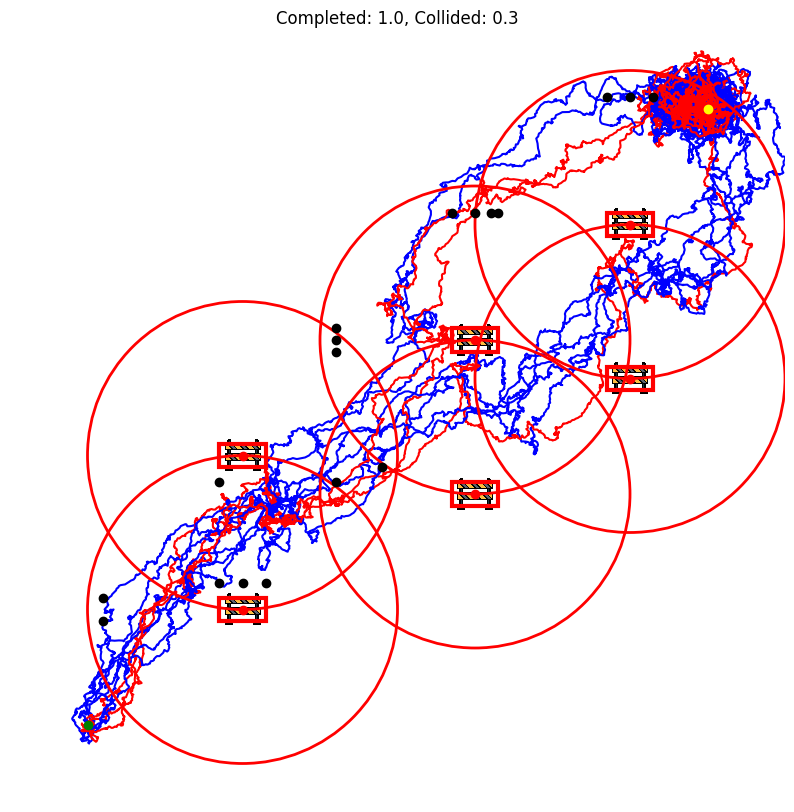

In [17]:
ax = draw_trajectory_colored(states, start, obstacles, targets, target_list, has_completed, has_collided, save=True)

## Verification

In [20]:
has_collided.any(1)

array([False, False, False,  True,  True, False, False, False, False,
        True])

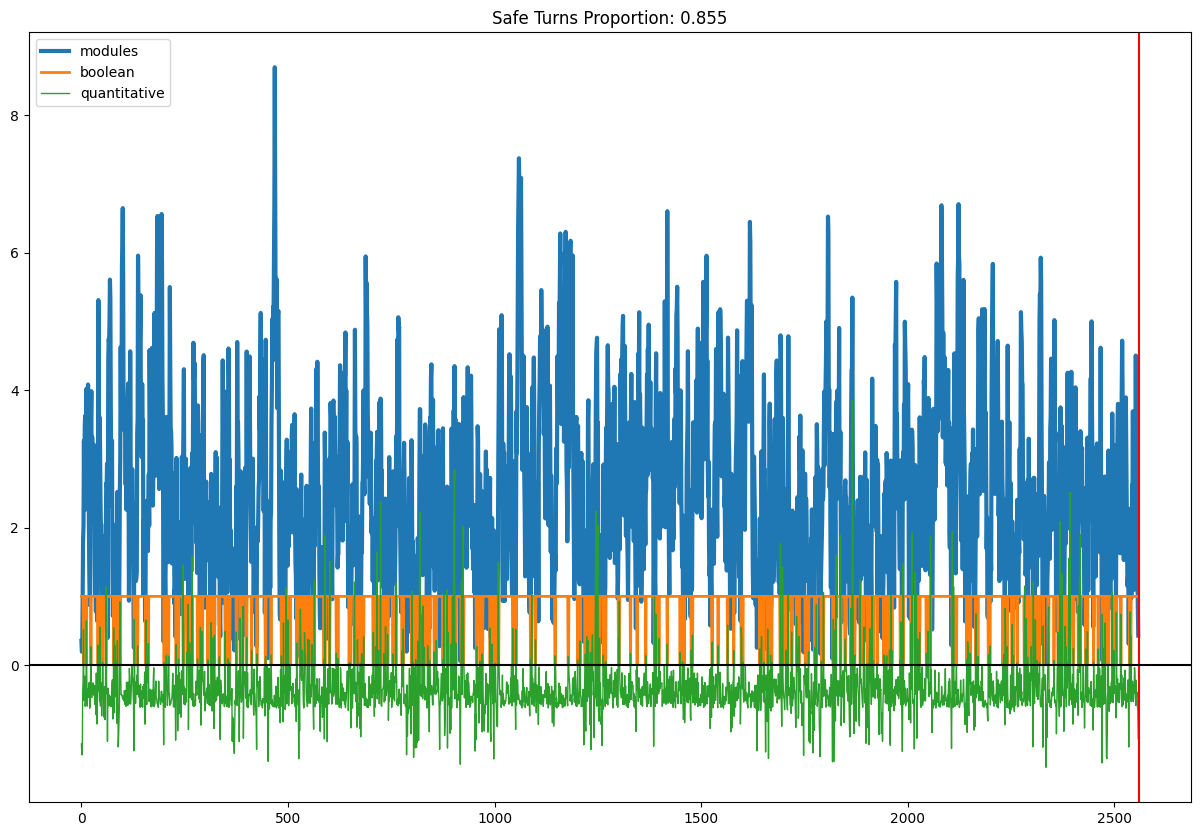

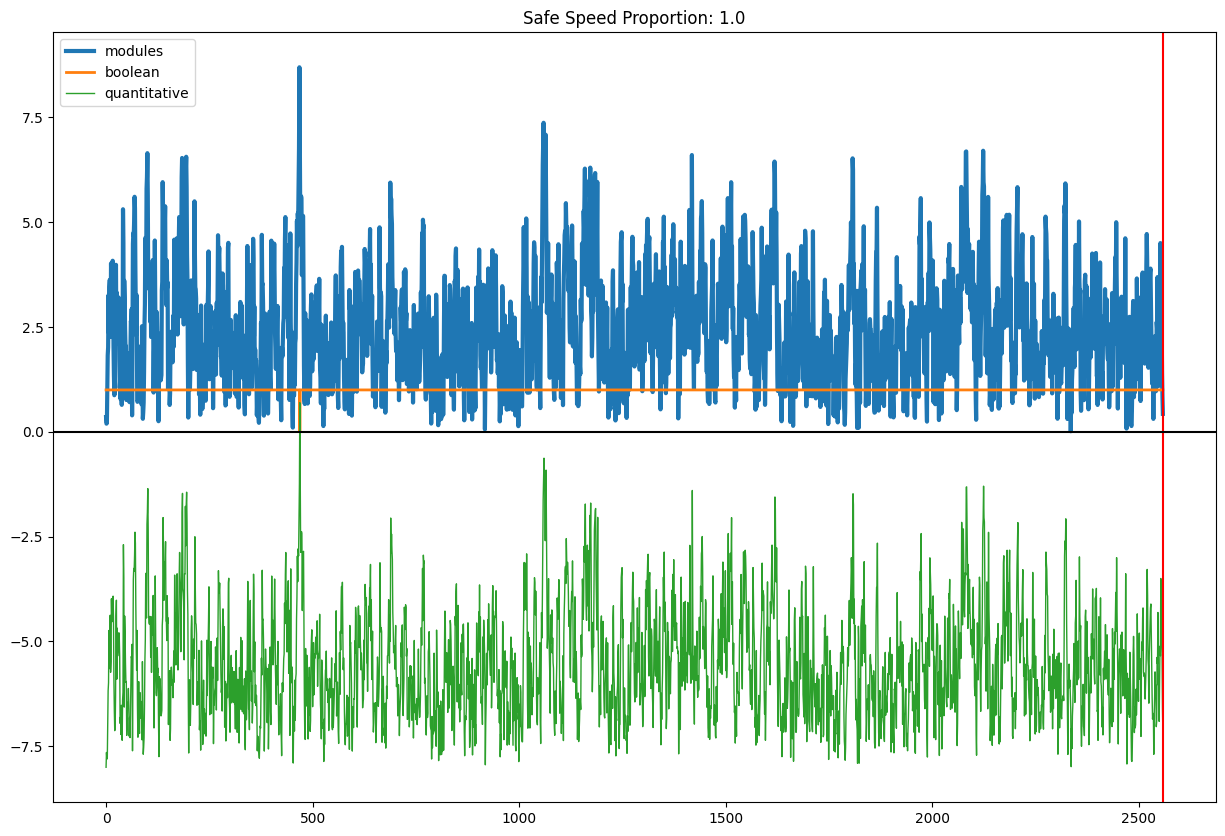

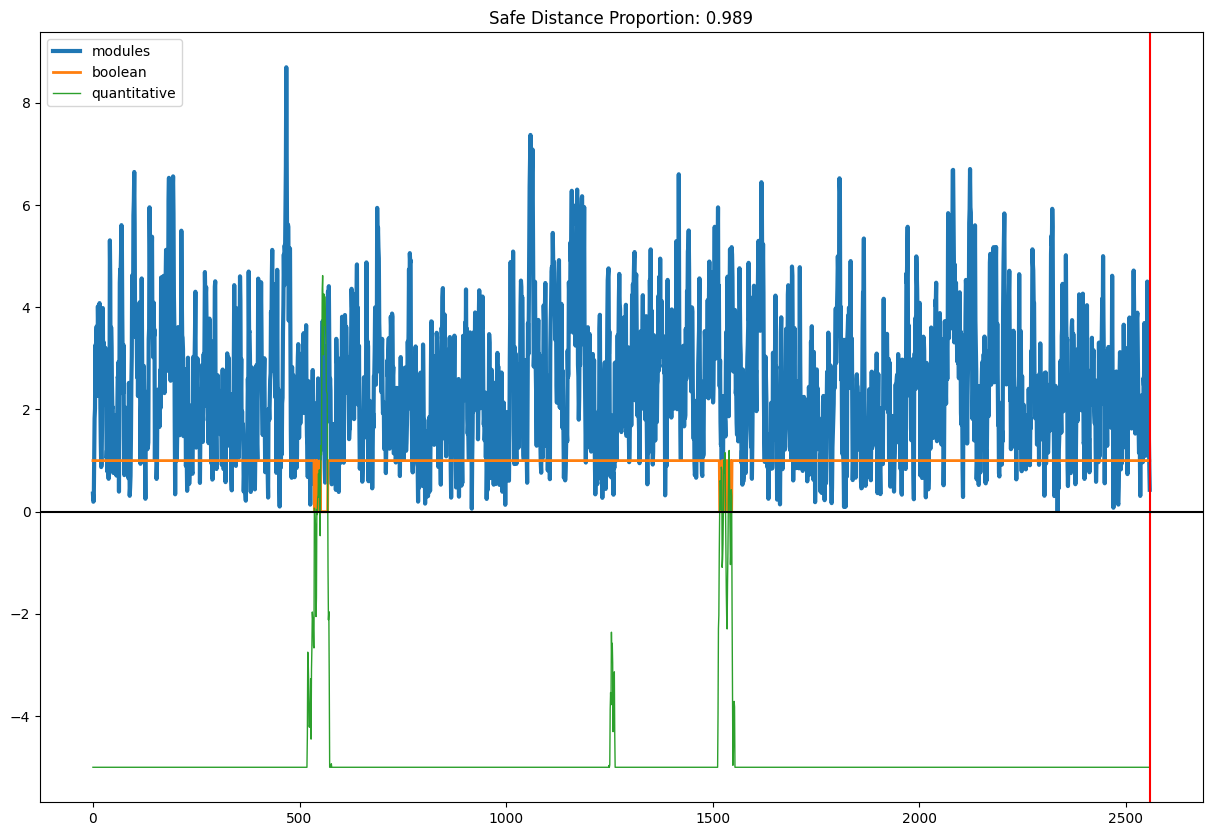

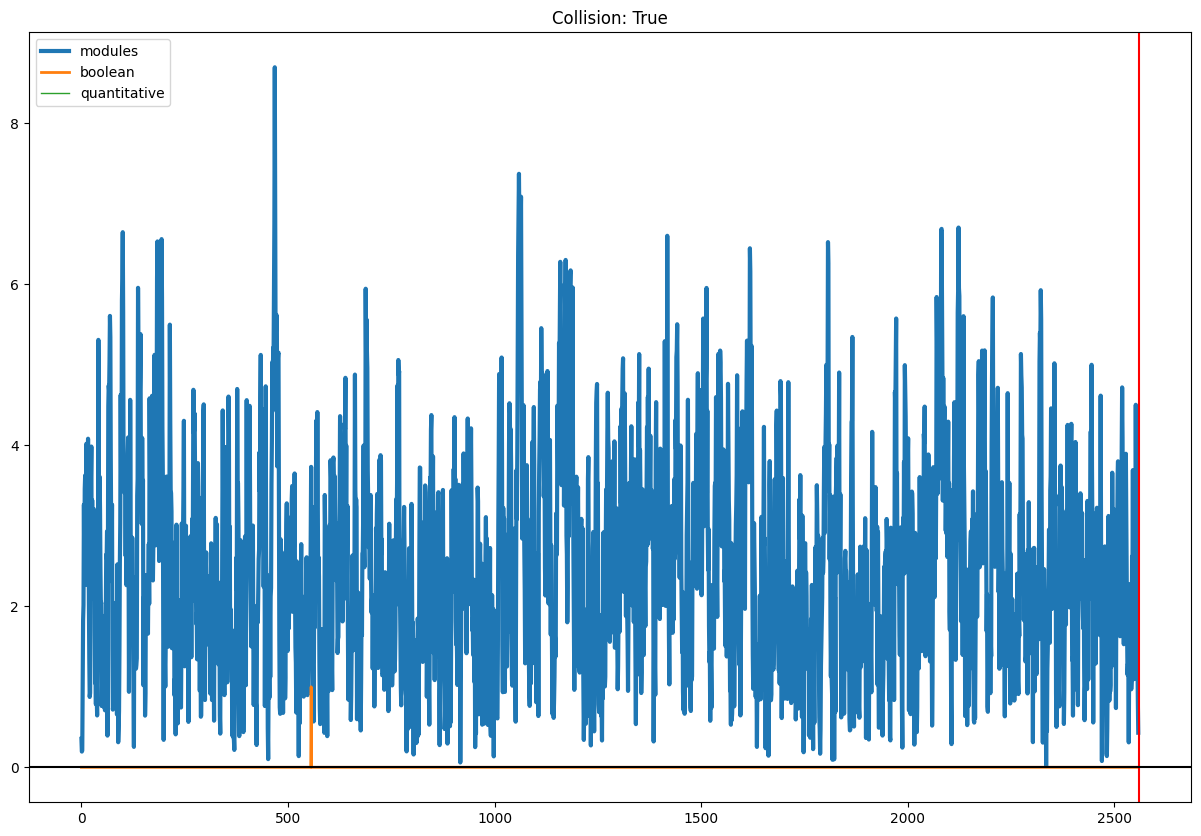

In [22]:
verification(states[3], theta_list[3], has_collided[3], has_completed[3], np.clip(targ_dist[3], -20, 20), speed_threshold=8, save=True)

## Inputs

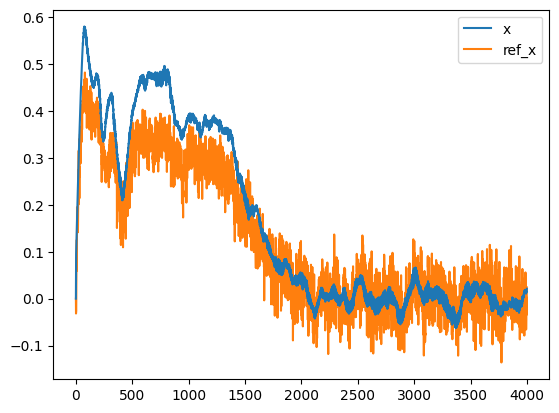

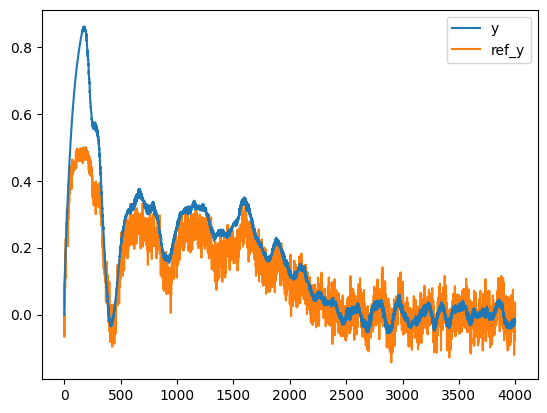

In [47]:
plot_inputs(u_list, reference_list, True)